#Imports

In [ ]:
#First I imported the libraries that I would need to utilize throughout my data analysis for this lab. These libraires included matplotlib.pyplot, pandas, numpy, scipy.stats, seaborn, and sklearn.neighbors.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sbn
from sklearn.neighbors import KernelDensity
import scipy.optimize as optimization
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
#Next I mounted my google drive so that I could access the file of data that I downloaded to my drive from my Co-lab notebook.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Then I used pandas to read the file of data I had downloaded from the JPL small body database and created a dataframe of this data.
file_path = '/content/drive/MyDrive/finaldata.csv'
data = pd.read_csv(file_path, skiprows = 0)
column_headers = list(data.columns.values)
column_headers

<ipython-input-4-49f105dcfd89>:3: DtypeWarning: Columns (2,3,23,24,68,70) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, skiprows = 0)


['spkid',
 'full_name',
 'pdes',
 'name',
 'prefix',
 'neo',
 'pha',
 'sats',
 'H',
 'G',
 'M1',
 'M2',
 'K1',
 'K2',
 'PC',
 'diameter',
 'extent',
 'albedo',
 'rot_per',
 'GM',
 'BV',
 'UB',
 'IR',
 'spec_B',
 'spec_T',
 'H_sigma',
 'diameter_sigma',
 'orbit_id',
 'epoch',
 'epoch_mjd',
 'epoch_cal',
 'equinox',
 'e',
 'a',
 'q',
 'i',
 'om',
 'w',
 'ma',
 'ad',
 'n',
 'tp',
 'tp_cal',
 'per',
 'per_y',
 'moid',
 'moid_ld',
 'moid_jup',
 't_jup',
 'sigma_e',
 'sigma_a',
 'sigma_q',
 'sigma_i',
 'sigma_om',
 'sigma_w',
 'sigma_ma',
 'sigma_ad',
 'sigma_n',
 'sigma_tp',
 'sigma_per',
 'class',
 'producer',
 'data_arc',
 'first_obs',
 'last_obs',
 'n_obs_used',
 'n_del_obs_used',
 'n_dop_obs_used',
 'condition_code',
 'rms',
 'two_body',
 'A1',
 'A1_sigma',
 'A2',
 'A2_sigma',
 'A3',
 'A3_sigma',
 'DT',
 'DT_sigma']

#Data Plots

(array([1.1737e+04, 9.9420e+03, 2.8200e+03, 2.1840e+03, 2.3200e+02,
        2.7800e+02, 1.3900e+02, 3.2800e+02, 1.9400e+02, 5.0400e+02,
        2.8200e+02, 6.6100e+02, 3.0900e+02, 6.3000e+02, 3.4900e+02,
        6.5700e+02, 2.2200e+02, 3.4400e+02, 1.2000e+02, 2.5200e+02,
        6.5000e+01, 1.0800e+02, 5.3000e+01, 2.1000e+02, 9.7000e+01,
        3.2000e+01, 1.4000e+01, 3.2000e+01, 1.6000e+01, 2.4000e+01,
        1.2000e+01, 1.6000e+01, 1.4000e+01, 1.6000e+01, 1.4000e+01,
        1.5000e+01, 6.0000e+00, 1.1000e+01, 8.0000e+00, 1.1000e+01,
        5.0000e+00, 1.8000e+01, 1.2000e+01, 2.4000e+01, 1.8000e+01,
        2.1000e+01, 1.7000e+01, 3.6000e+01, 5.7000e+01, 3.6200e+02,
        1.0530e+03, 8.3200e+02, 1.6790e+03, 8.2100e+02, 9.1600e+02,
        1.5600e+02, 1.5700e+02, 1.9000e+01, 9.0000e+00, 2.0000e+00,
        5.0000e+00, 3.0000e+00, 1.6000e+01, 7.0000e+00, 6.0000e+00,
        5.0000e+00, 9.0000e+00, 0.0000e+00, 4.0000e+00, 6.0000e+00,
        5.0000e+00, 2.0000e+00, 6.0000e+00, 3.00

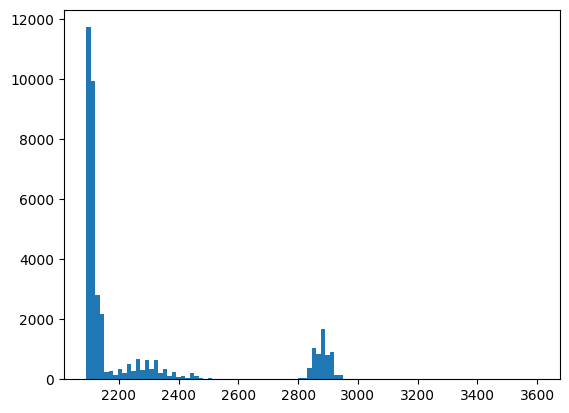

In [ ]:
#Period
plt.hist(data['per'], bins=100)

(array([  95.,  305.,  466.,  727.,  824., 1007., 1150., 1219., 1252.,
        1386., 1456., 1497., 1492., 1488., 1549., 1536., 1413., 1376.,
        1380., 1268., 1227., 1128., 1014.,  998.,  930.,  827.,  811.,
         757.,  716.,  673.,  620.,  616.,  545.,  501.,  465.,  430.,
         399.,  366.,  376.,  331.,  314.,  257.,  250.,  184.,  171.,
         145.,  113.,   85.,   89.,   96.,   58.,   55.,   55.,   51.,
          36.,   36.,   40.,   22.,   32.,   30.,   27.,   28.,   32.,
          25.,   29.,   28.,   27.,   25.,   30.,   13.,   24.,   21.,
          18.,   23.,   19.,   17.,   18.,   15.,   26.,   18.,   17.,
          19.,   18.,   17.,   17.,   20.,   14.,    4.,   11.,    7.,
           8.,    4.,    6.,    5.,    3.,    2.,    0.,    2.,    2.,
           3.]),
 array([6.00000e-04, 7.52600e-03, 1.44520e-02, 2.13780e-02, 2.83040e-02,
        3.52300e-02, 4.21560e-02, 4.90820e-02, 5.60080e-02, 6.29340e-02,
        6.98600e-02, 7.67860e-02, 8.37120e-02, 9.06380e-

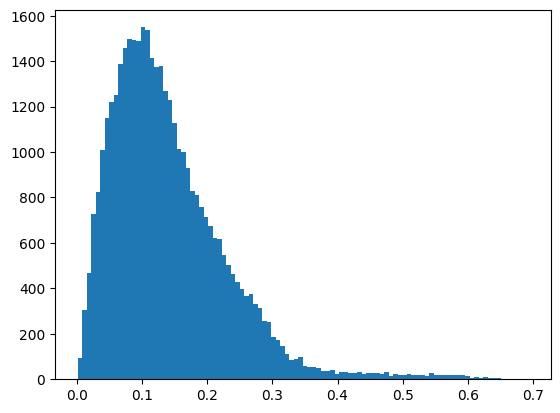

In [ ]:
#eccentricity
plt.hist(data['e'], bins=100)

(array([1.1119e+04, 7.7680e+03, 4.8170e+03, 2.3950e+03, 7.0300e+02,
        2.4100e+02, 1.7800e+02, 1.8600e+02, 2.5500e+02, 2.8700e+02,
        3.5900e+02, 4.1100e+02, 4.4100e+02, 4.6100e+02, 4.5300e+02,
        4.6500e+02, 4.8900e+02, 3.7900e+02, 2.9500e+02, 1.8200e+02,
        1.6100e+02, 1.7200e+02, 6.7000e+01, 8.3000e+01, 1.0600e+02,
        1.8100e+02, 8.1000e+01, 1.9000e+01, 1.7000e+01, 2.4000e+01,
        1.9000e+01, 2.1000e+01, 1.8000e+01, 1.0000e+01, 1.9000e+01,
        1.0000e+01, 1.7000e+01, 1.2000e+01, 7.0000e+00, 1.0000e+01,
        9.0000e+00, 1.1000e+01, 7.0000e+00, 1.5000e+01, 1.8000e+01,
        1.7000e+01, 2.6000e+01, 1.2000e+01, 2.4000e+01, 2.4000e+01,
        8.9000e+01, 2.8900e+02, 6.4800e+02, 1.1390e+03, 1.2830e+03,
        1.2870e+03, 8.3200e+02, 3.1500e+02, 1.4700e+02, 3.2000e+01,
        7.0000e+00, 3.0000e+00, 5.0000e+00, 4.0000e+00, 1.5000e+01,
        8.0000e+00, 5.0000e+00, 7.0000e+00, 7.0000e+00, 2.0000e+00,
        3.0000e+00, 7.0000e+00, 4.0000e+00, 5.00

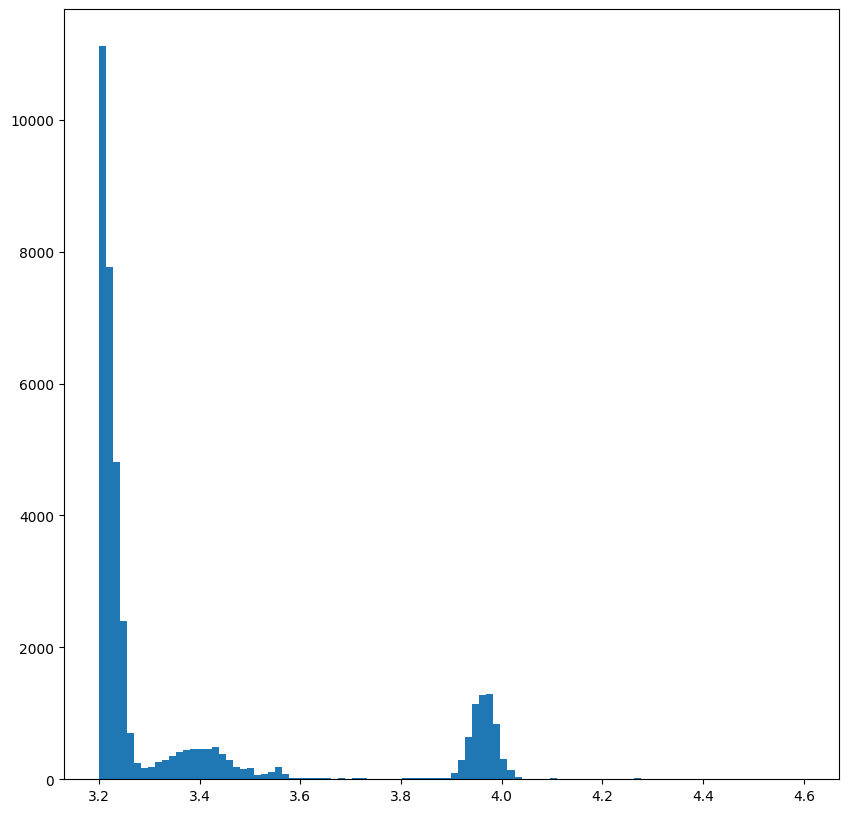

In [ ]:
#semi major axis
plt.figure(figsize = (10, 10), dpi = 100)
plt.hist(data['a'], bins = 100)

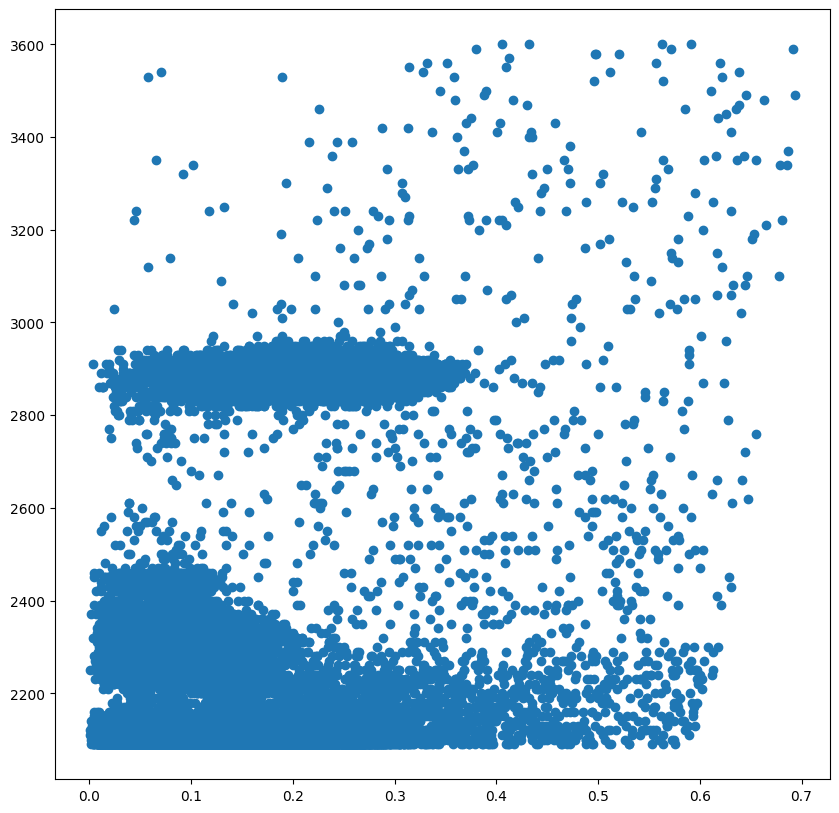

In [ ]:
#ecc v period
plt.figure(figsize = (10, 10), dpi = 100)
plt.scatter(data["e"], data["per"])


#Hypothesis Test

##First Version, Splitting data into two lobes

###Splitting Data Up

Null: Group A and Group B come from the same population.
Alt: Group A and Group B come from different populations.

For now, eyeballing groups

Group A:   2220<PER<2480

Group B:   2800<PER<2950

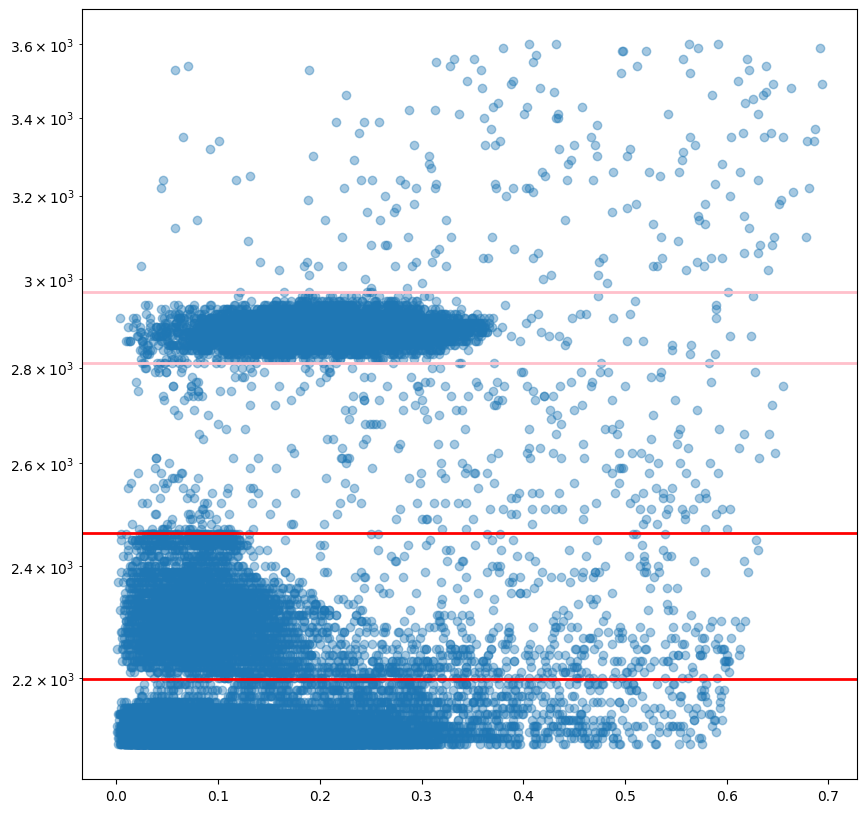

In [ ]:
#splitting data into groups
plt.figure(figsize = (10, 10), dpi = 100)
plt.scatter(data["e"], data["per"], alpha = 0.4)
plt.yscale("log")
#eyeballing how to divide data with vertical lines

#Group A
plt.axhline(y = 2198, color = 'RED', linestyle = '-', linewidth = 2.0)
plt.axhline(y = 2462, color = 'RED', linestyle = '-', linewidth = 2.0)

#Group B
plt.axhline(y = 2810, color = 'PINK', linestyle = '-', linewidth = 2.0)
plt.axhline(y = 2970, color = 'PINK', linestyle = '-', linewidth = 2.0)



In [ ]:
#Making dataframe for group a
dataA = data[['per','e']].dropna(how = 'any')
x1 = 2198.0
x2 = 2462.0
for index, row in data.iterrows():
  if ((row['per'] >= x2) | (row['per'] <= x1)):
    dataA = dataA.drop([index])


In [ ]:
#Making dataframe for group b
dataB = data[['per','e']].dropna(how = 'any')
x = 3000.0
y = 2800.0
for index, row in data.iterrows():
  if ((row['per'] >= x) | (row['per'] <= y)):
    dataB = dataB.drop([index])


Text(0, 0.5, 'Period (days) ')

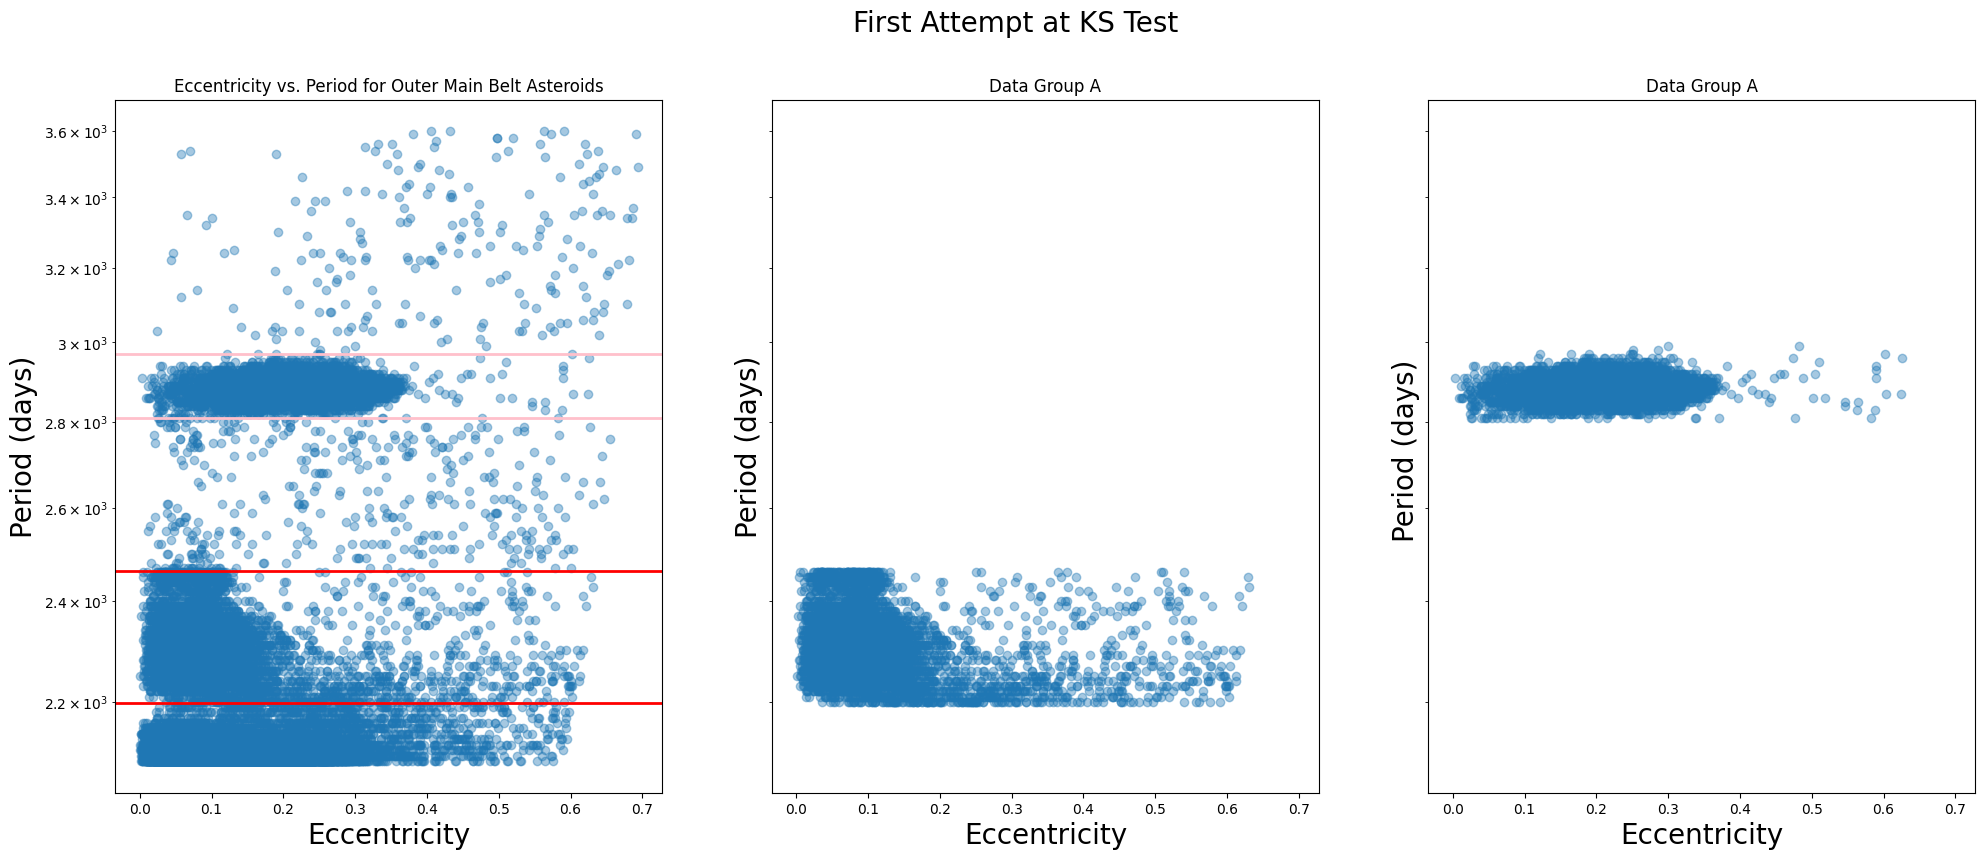

In [ ]:
#three plots
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,9), sharex=True, sharey=True )
f.suptitle('First Attempt at KS Test', fontsize = 20)

#Both Together
ax1.scatter(data['e'],data['per'], alpha = 0.4)
ax1.set_xlabel("Eccentricity", fontsize = 20)
ax1.set_ylabel("Period (days)", fontsize = 20)
ax1.title.set_text("Eccentricity vs. Period for Outer Main Belt Asteroids")
ax1.set_yscale('log')
ax1.axhline(y = 2198, color = 'RED', linestyle = '-', linewidth = 2.0)
ax1.axhline(y = 2462, color = 'RED', linestyle = '-', linewidth = 2.0)
ax1.axhline(y = 2810, color = 'PINK', linestyle = '-', linewidth = 2.0)
ax1.axhline(y = 2970, color = 'PINK', linestyle = '-', linewidth = 2.0)

#Just group A
ax2.scatter(dataA['e'], dataA['per'], alpha = 0.4)
ax2.title.set_text("Data Group A")
ax1.set_yscale('log')
ax2.set_xlabel("Eccentricity", fontsize = 20)
ax2.set_ylabel("Period (days)", fontsize = 20)


#Just group B
ax3.scatter(dataB['e'], dataB['per'], alpha = 0.4)
ax3.title.set_text("Data Group A")
ax3.set_yscale('log')
ax3.set_xlabel("Eccentricity", fontsize = 20)
ax3.set_ylabel("Period (days) ", fontsize = 20)

###KS Test

In [ ]:
#ECDF Function, normalized
def ecdf (data):
  xdatacdf = np.sort(data)
  ydatacdf = np.arange(1, len(data)+1/len(data))
  ydatacdf = ydatacdf/len(data)
  return xdatacdf, ydatacdf

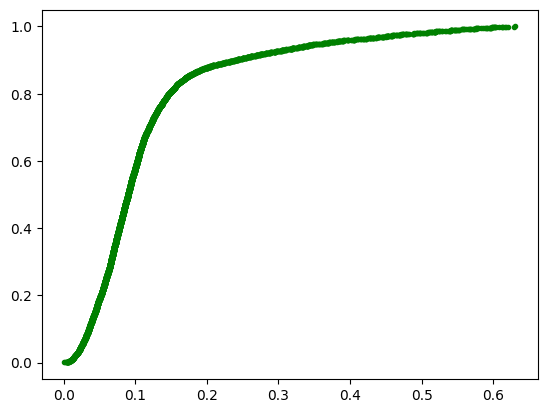

In [ ]:
#Group A ECDF
x, y = ecdf(dataA['e'])
plt.plot(x, y, marker = '.', linestyle = 'none', color = "green")

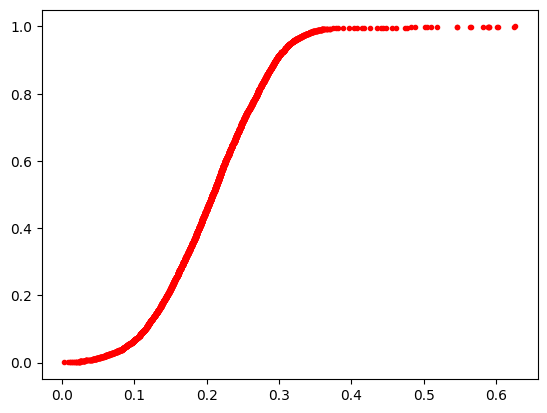

In [ ]:
#Group B ECDF
x, y = ecdf(dataB['e'])
plt.plot(x, y, marker = '.', linestyle = 'none', color = "red")

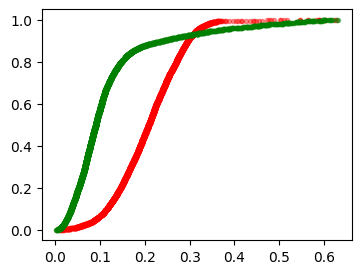

In [ ]:
#ECDF overplot
plt.figure(figsize=(4, 3))
ax = plt.axes()
x, y = ecdf(dataB['e'])
ax.plot(x, y, marker = '.', linestyle = 'none', alpha = 0.4, color = 'RED')
x1, y1 = ecdf(dataA['e'])
ax.plot(x1, y1, marker = '.', linestyle = 'none', alpha = 0.4, color = 'GREEN')

In [ ]:
#two sample KS test
stats.ks_2samp(dataA['per'], dataB['per'])

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=2460.0, statistic_sign=1)

##KS Test Attempt 2: Outlying Lobe and everything else

###Splitting data up

In [ ]:
#MAKE SMALL DATA CHUNK SQUARE
smallsamp = data[['per','e']].dropna(how = 'any')
x = 3000.0
y = 2800.0
for index, row in data.iterrows():
  if ((row['per'] >= x) | (row['per'] <= y)):
    smallsamp = smallsamp.drop([index])


In [ ]:
#EVERYTHING ELSE
largesamp = data[['per','e']].dropna(how = 'any')
x1= 3000
x2 = 2800
for index, row in data.iterrows():
  if ((row['per'] >= x2) & (row['per'] <= x1)):
    largesamp = largesamp.drop([index])

Text(0, 0.5, 'Per')

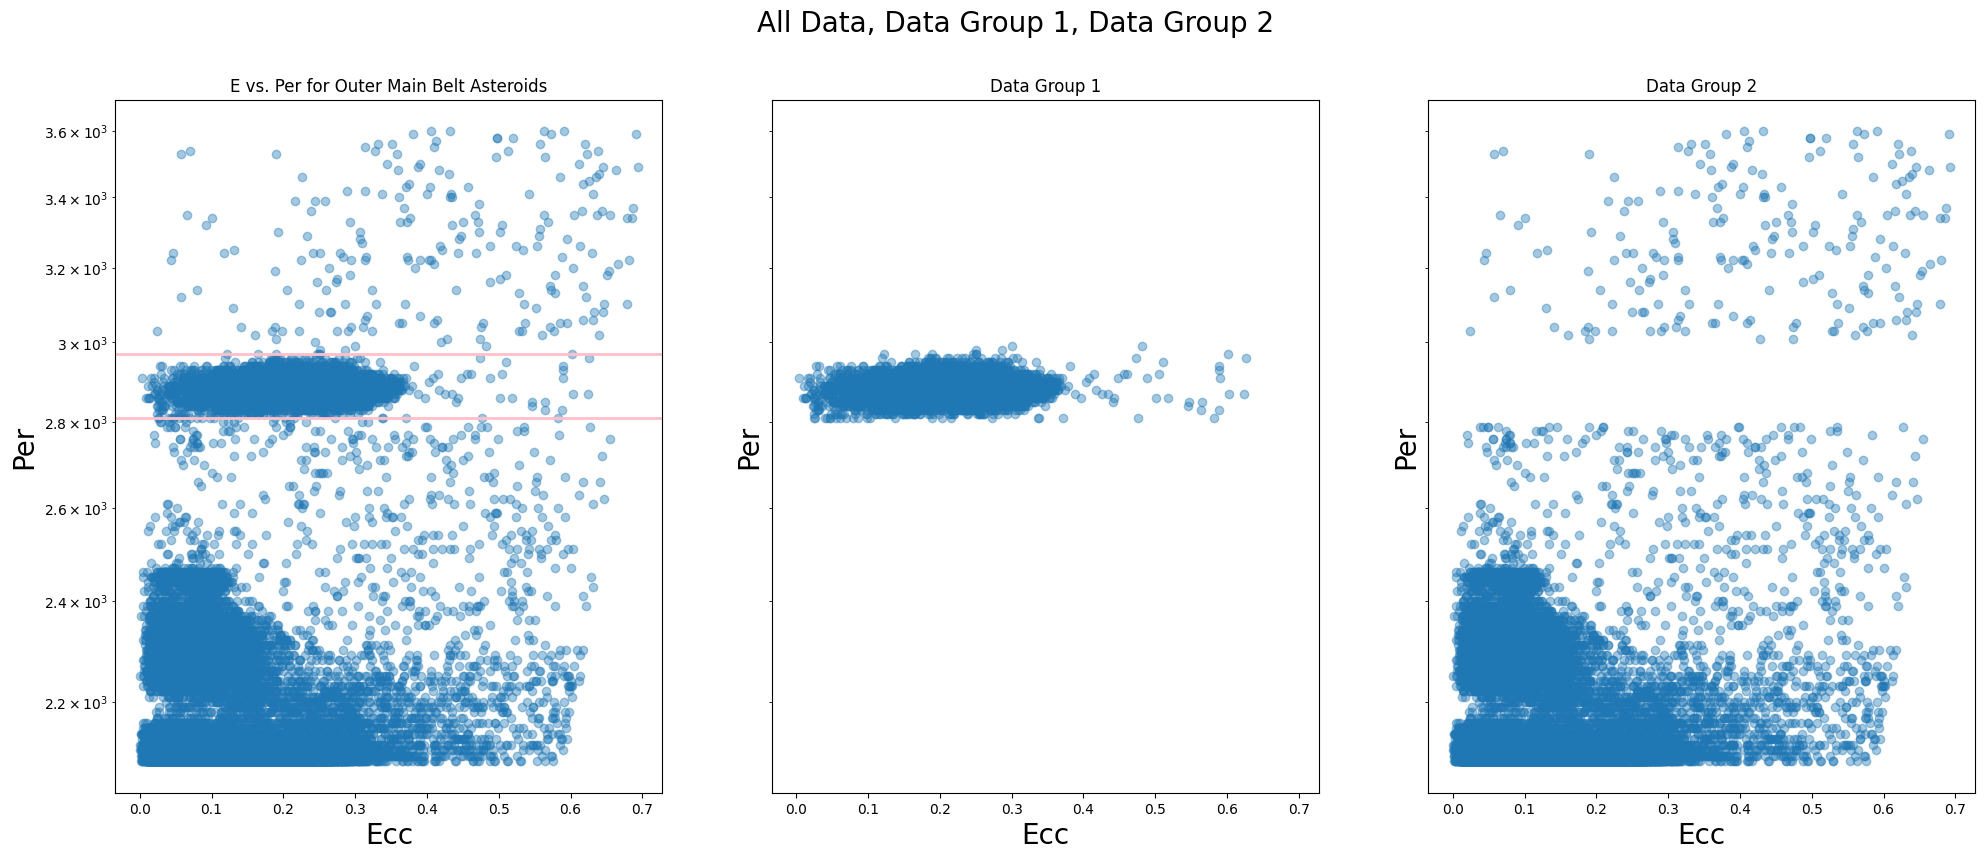

In [ ]:
#three plots
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,9), sharex=True, sharey=True )
f.suptitle('All Data, Data Group 1, Data Group 2', fontsize = 20)

#Both Together
ax1.scatter(data['e'],data['per'], alpha = 0.4)
ax1.set_xlabel("Ecc", fontsize = 20)
ax1.set_ylabel("Per", fontsize = 20)
ax1.title.set_text("E vs. Per for Outer Main Belt Asteroids")
ax1.set_yscale('log')
ax1.axhline(y = 2810, color = 'PINK', linestyle = '-', linewidth = 2.0)
ax1.axhline(y = 2970, color = 'PINK', linestyle = '-', linewidth = 2.0)

#small group
ax2.scatter(smallsamp['e'], smallsamp['per'], alpha = 0.4)
ax2.title.set_text("Data Group 1")
ax1.set_yscale('log')
ax2.set_xlabel("Ecc", fontsize = 20)
ax2.set_ylabel("Per", fontsize = 20)


#larget
ax3.scatter(largesamp['e'], largesamp['per'], alpha = 0.4)
ax3.title.set_text("Data Group 2")
ax3.set_yscale('log')
ax3.set_xlabel("Ecc", fontsize = 20)
ax3.set_ylabel("Per", fontsize = 20)

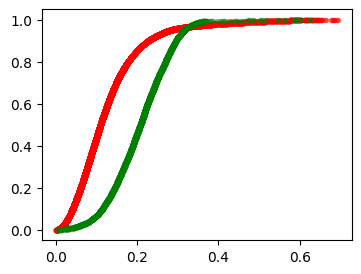

In [ ]:
#ECDF overplot
plt.figure(figsize=(4, 3))
ax = plt.axes()
x, y = ecdf(largesamp['e'])
ax.plot(x, y, marker = '.', linestyle = 'none', alpha = 0.4, color = 'RED')
x1, y1 = ecdf(smallsamp['e'])
ax.plot(x1, y1, marker = '.', linestyle = 'none', alpha = 0.4, color = 'GREEN')

In [ ]:
stats.ks_2samp(largesamp['e'], smallsamp['e'])

KstestResult(statistic=0.4876632731071021, pvalue=0.0, statistic_location=0.1492, statistic_sign=1)

(array([ 148.,  688., 1619., 1976., 1337.,  282.,   10.,   10.,    6.,
          10.]),
 array([0.0033 , 0.06559, 0.12788, 0.19017, 0.25246, 0.31475, 0.37704,
        0.43933, 0.50162, 0.56391, 0.6262 ]),
 <BarContainer object of 10 artists>)

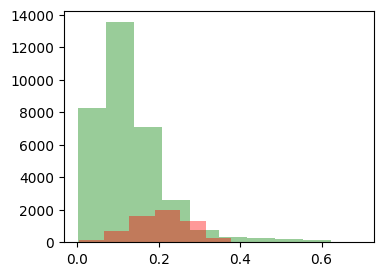

In [ ]:
#hist overplot
plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.hist(largesamp['e'], linestyle = 'none', alpha = 0.4, color = 'GREEN')
ax.hist(smallsamp['e'], linestyle = 'none', alpha = 0.4, color = 'RED')

(array([ 148.,  688., 1619., 1976., 1337.,  282.,   10.,   10.,    6.,
          10.]),
 array([0.0033 , 0.06559, 0.12788, 0.19017, 0.25246, 0.31475, 0.37704,
        0.43933, 0.50162, 0.56391, 0.6262 ]),
 <BarContainer object of 10 artists>)

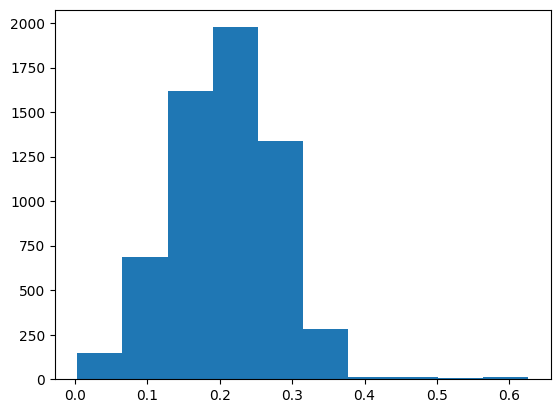

In [ ]:
plt.hist(smallsamp['e'])

In [ ]:
#single sample ks test
xcdf1, ycdf1 = ecdf(smallsamp['e'])
D, p = stats.kstest(smallsamp, lambda x: np.interp(smallsamp['e'], xcdf1, ycdf1))
print(D)
print(p)

0.9768320736115675
0.0


(array([ 8259., 13541.,  7116.,  2620.,   774.,   354.,   252.,   192.,
          134.,    34.]),
 array([6.0000e-04, 6.9860e-02, 1.3912e-01, 2.0838e-01, 2.7764e-01,
        3.4690e-01, 4.1616e-01, 4.8542e-01, 5.5468e-01, 6.2394e-01,
        6.9320e-01]),
 <BarContainer object of 10 artists>)

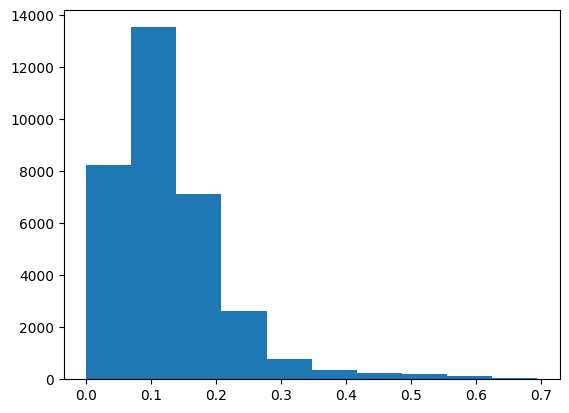

In [ ]:
plt.hist(largesamp['e'])

In [ ]:
#single sample ks test
xcdf2, xcdf2 = ecdf(largesamp['e'])
D, p = stats.kstest(largesamp, lambda x: np.interp(largesamp['e'], xcdf2, xcdf2))
print(D)
print(p)

0.9900088111551869
0.0


KS test, handmade

In [ ]:
# #cdf, used by KS test
# def cdf(sample, x, sort = False):
#     # Sorts the sample, if unsorted
#     if sort:
#         sample.sort()
#     # Counts how many observations are below x
#     cdf = sum(sample <= x)
#     # Divides by the total number of observations
#     cdf = cdf / len(sample)
#     return cdf

In [ ]:
# #KS test
# def ks_2samp(sample1, sample2):
#     # Gets all observations
#     observations = np.concatenate((sample1, sample2))
#     observations.sort()
#     # Sorts the samples
#     sample1.sort()
#     sample2.sort()
#     # Evaluates the KS statistic
#     D_ks = [] # KS Statistic list
#     for x in observations:
#         cdf_sample1 = cdf(sample = sample1, x  = x)
#         cdf_sample2 = cdf(sample = sample2, x  = x)
#         D_ks.append(abs(cdf_sample1 - cdf_sample2))
#     ks_stat = max(D_ks)
#     # Calculates the P-Value based on the two-sided test
#     # The P-Value comes from the KS Distribution Survival Function (SF = 1-CDF)
#     m, n = float(len(sample1)), float(len(sample2))
#     en = m * n / (m + n)
#     p_value = stats.kstwo.sf(ks_stat, np.round(en))
#     return {"ks_stat": ks_stat, "p_value" : p_value}

In [ ]:
#arrL = np.array(largesamp)
#arrS = np.array(smallsamp)
#ks_2samp(arrL[:,1],arrS[:,1] )

#Model

##Model Attempt 1

In [ ]:
#Make best fits for the dense groups of points
#first step, separate the data

#yellow
data1 = data[['per','e']].dropna(how = 'any')
x1 = 0.0
x2 = 2200.0
for index, row in data.iterrows():
  if ((row['per'] >= x2) | (row['per'] <= x1)):
    data1 = data1.drop([index])

#red
data2 = data[['per','e']].dropna(how = 'any')
x1 = 2200.0
x2 = 2400.0
for index, row in data.iterrows():
  if ((row['per'] >= x2) | (row['per'] <= x1)):
    data2 = data2.drop([index])

#blue
data3 = data[['per','e']].dropna(how = 'any')
x1 = 2400.0
x2 = 2490.0
for index, row in data.iterrows():
  if ((row['per'] >= x2) | (row['per'] <= x1)):
    data3 = data3.drop([index])

#green
data4 = data[['per','e']].dropna(how = 'any')
x1 = 2800.0
x2 = 3000.0
for index, row in data.iterrows():
  if ((row['per'] >= x2) | (row['per'] <= x1)):
    data4 = data4.drop([index])

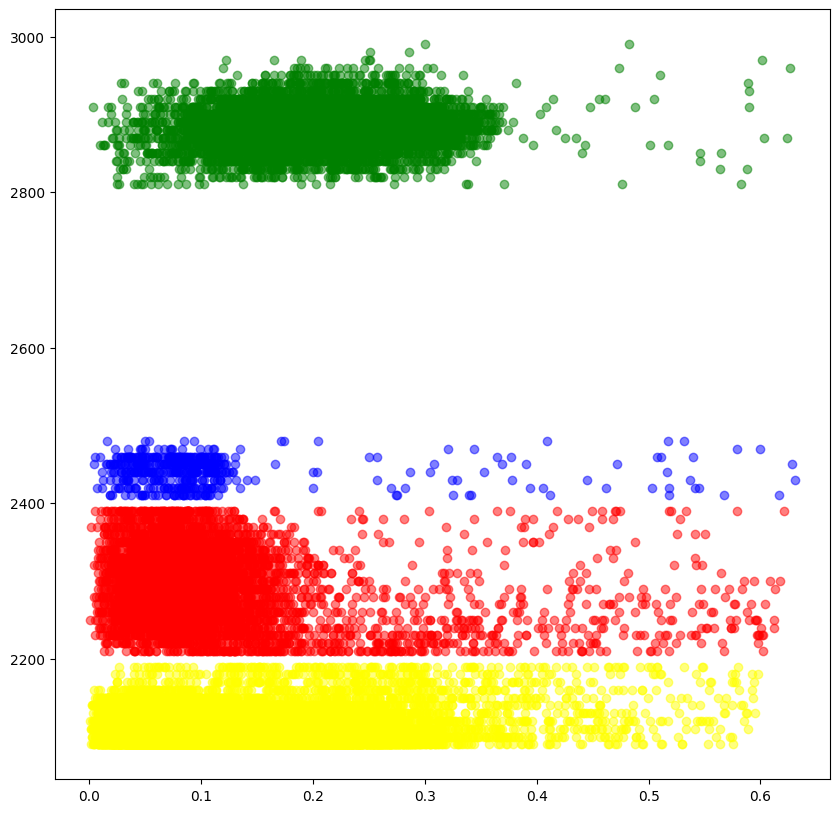

In [ ]:
plt.figure(figsize = (10, 10), dpi = 100)
plt.scatter(data1['e'], data1['per'], alpha = 0.5, color = 'YELLOW')
plt.scatter(data2['e'], data2['per'], alpha = 0.5, color = 'RED')
plt.scatter(data3['e'], data3['per'], alpha = 0.5, color = 'BLUE')
plt.scatter(data4['e'], data4['per'], alpha = 0.5, color = 'GREEN')

In [ ]:
def slopeintfunc(x,sl,incpt):
  return (sl*x)+incpt

In [ ]:
#yellow data, data1
plt.figure(figsize=(4, 3))
fit_new = optimization.curve_fit(slopeintfunc, data1['e'],data1['per'])
slope_new = fit_new[0][0]
inter_new = fit_new[0][1]
plt.plot(data['e'], data['e']*slope_new +inter_new, color ='RED')
plt.scatter(data1['e'], data1['per'])
plt.xlim(0,0.6)
plt.ylim(2000,2400)

##Model Attempt 2

Period and Jupiter MOID
- period is the length of asteroids orbit
- Jupiter MOID is the distance between the two closest points of two objects orbits (in this case, the distance between the closest points of an asteroids orbit and jupiters orbit)
- graph below shows that as an asteroids period gets longer, its jupiter MOID (au) gets smaller
- also there are kind of two clumps of asteroids around 2 different period groups, the clump around the shorter period has a generally greater distance from jupiter, the clump around the longer period has a smaller distance from jupiter

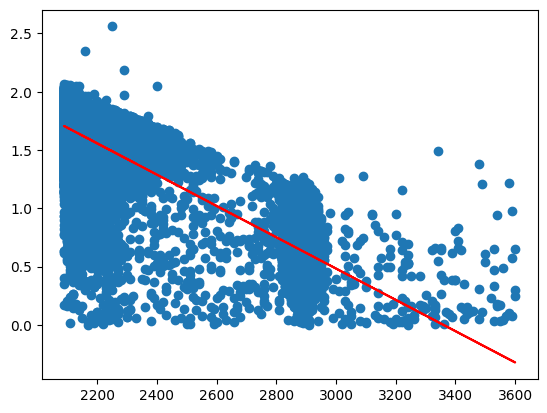

In [ ]:

datab = data[['per','moid_jup']].dropna(how = 'any')
fit_new = optimization.curve_fit(slopeintfunc, datab['per'],datab['moid_jup'])
slope_new2 = fit_new[0][0]
inter_new2 = fit_new[0][1]
plt.plot(datab['per'], datab['per']*slope_new2 +inter_new2, color ='RED')
plt.scatter(data['per'], data['moid_jup'])


In [ ]:
#residuals, fitted value on x axis, residual on y axis (difference between prediction and real)

Perihelion Distance and Eccentricity  
- q, perihelion is the closest distance to the sun in an objects orbit
- e, eccentricity is how close an objects orbit is to a perfect circle
- as eccentricity increases, perihelion decreases
- likely one value was used to calcuate another, thats why they have such a strong linear correlation

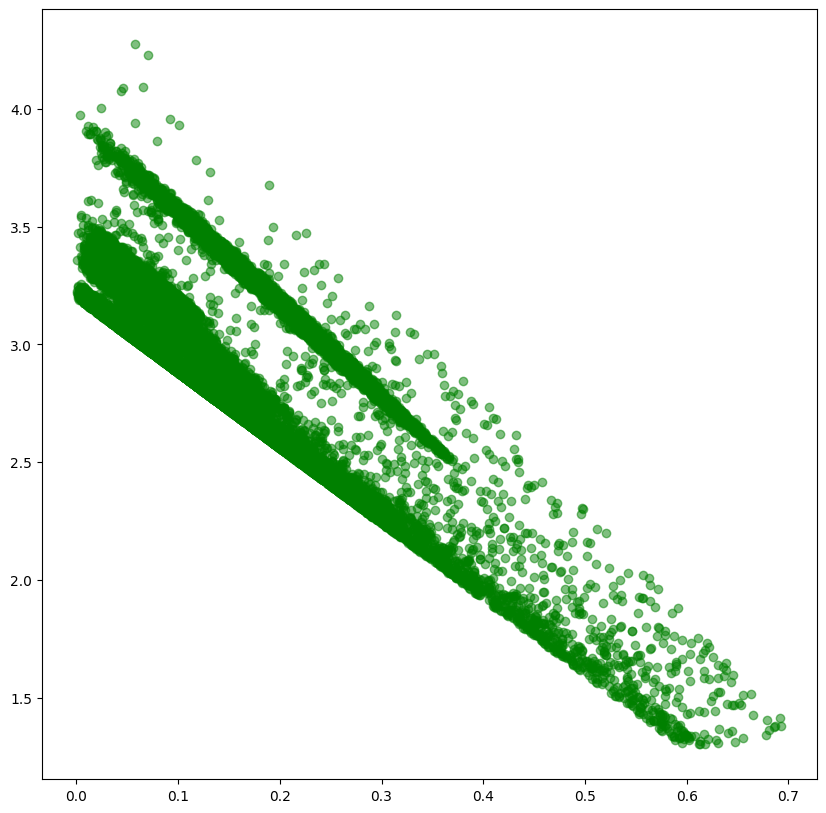

In [ ]:
#model fit of q and e, probably used to calculated eachother given the sterngth of the linear fit (q = shortest distance between asteroid and earth, e = eccentricity)
#less eccentric orbits have larger min distance to the sun
plt.figure(figsize = (10, 10), dpi = 100)
plt.scatter(data['e'], data['q'], alpha = 0.5, color = 'GREEN')

In [ ]:
fit = optimization.curve_fit(slopeintfunc, data['e'],data['q'])
slope = fit[0][0]
inter= fit[0][1]


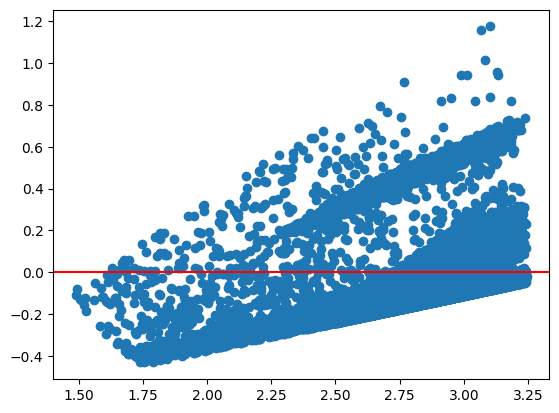

In [ ]:
predy = (data['e']*slope)+inter
resid = data['q'] - predy
plt.scatter(predy, resid)
plt.axhline(y=0.0, color = 'red')

In [ ]:
#data split up


#yellow
data1a = data[['per','e', 'q']].dropna(how = 'any')
x1 = 0.0
x2 = 2200.0
for index, row in data.iterrows():
  if ((row['per'] >= x2) | (row['per'] <= x1)):
    data1a = data1a.drop([index])

#red
data2a = data[['per','e', 'q']].dropna(how = 'any')
x1 = 2200.0
x2 = 2400.0
for index, row in data.iterrows():
  if ((row['per'] >= x2) | (row['per'] <= x1)):
    data2a = data2a.drop([index])

#blue
data3a = data[['per','e', 'q']].dropna(how = 'any')
x1 = 2400.0
x2 = 2490.0
for index, row in data.iterrows():
  if ((row['per'] >= x2) | (row['per'] <= x1)):
    data3a = data3a.drop([index])


#skinny group of data is first green period group
data4a = data[['per','e', 'q']].dropna(how = 'any')
x1 = 2800.0
x2 = 3000.0
for index, row in data.iterrows():
  if ((row['per'] >= x2) | (row['per'] <= x1)):
    data4a = data4a.drop([index])

In [ ]:
#data1
fit_new1 = optimization.curve_fit(slopeintfunc, data1a['e'],data1a['q'])
slope_new1 = fit_new1[0][0]
inter_new1= fit_new1[0][1]

#data2
fit_new2 = optimization.curve_fit(slopeintfunc, data2a['e'],data2a['q'])
slope_new2 = fit_new2[0][0]
inter_new2= fit_new2[0][1]

#data3
fit_new3 = optimization.curve_fit(slopeintfunc, data3a['e'],data3a['q'])
slope_new3 = fit_new3[0][0]
inter_new3= fit_new3[0][1]

#data4
fit_new4 = optimization.curve_fit(slopeintfunc, data4a['e'],data4a['q'])
slope_new4 = fit_new4[0][0]
inter_new4= fit_new4[0][1]

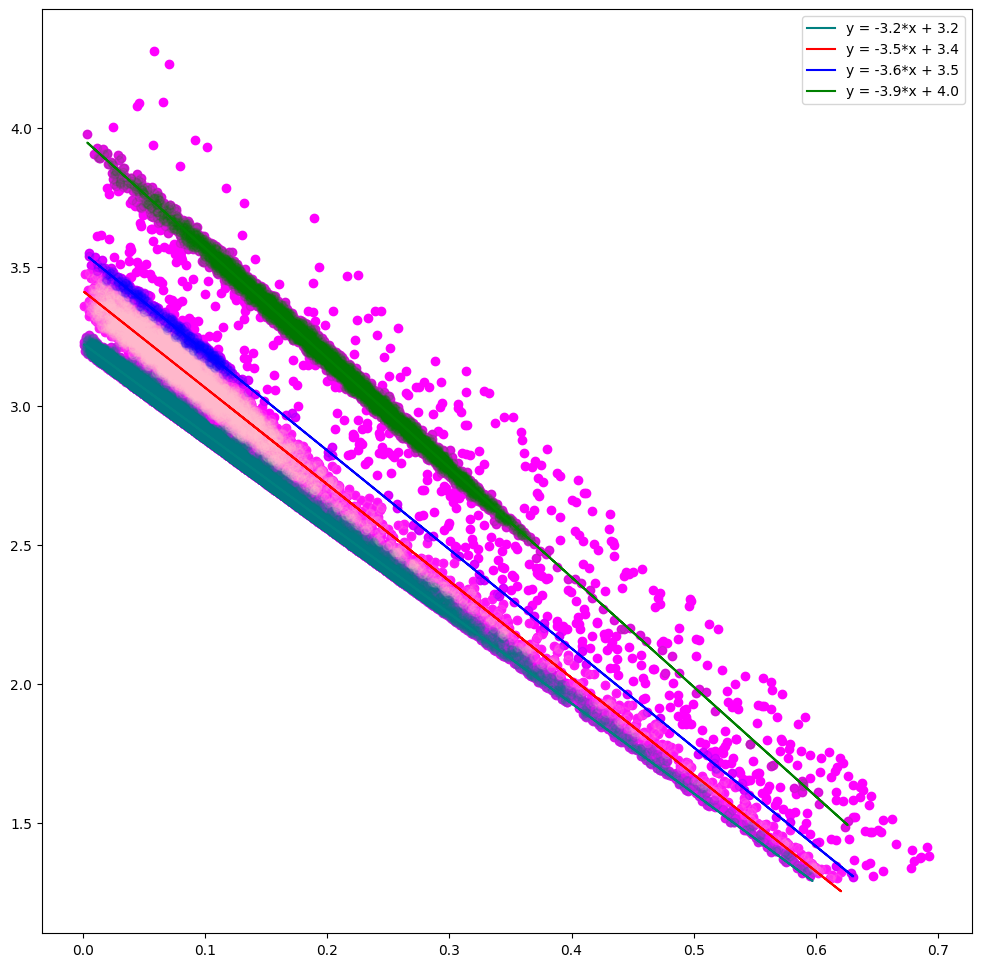

In [ ]:
#LSRL
plt.figure(figsize = (12, 12), dpi = 100)
plt.scatter(data['e'], data['q'], alpha = 1, color = 'magenta')
plt.scatter(data1a['e'], data1a['q'], alpha = 0.1, color = 'TEAL')
plt.scatter(data2a['e'], data2a['q'], alpha = 0.1, color = 'PINK')
plt.scatter(data3a['e'], data3a['q'], alpha = 0.1, color = 'BLUE')
plt.scatter(data4a['e'], data4a['q'], alpha = 0.1, color = 'GREEN')

#data1
plt.plot(data1a['e'], data1a['e']*slope_new1 +inter_new1, color ='TEAL', label = 'y = -3.2*x + 3.2')

#data2
plt.plot(data2a['e'], data2a['e']*slope_new2 +inter_new2, color ='RED', label = 'y = -3.5*x + 3.4')

#data3
plt.plot(data3a['e'], data3a['e']*slope_new3 +inter_new3, color ='BLUE', label = 'y = -3.6*x + 3.5')

#data4
plt.plot(data4a['e'], data4a['e']*slope_new4 +inter_new4, color ='GREEN', label = 'y = -3.9*x + 4.0')

plt.legend(loc = "upper right")

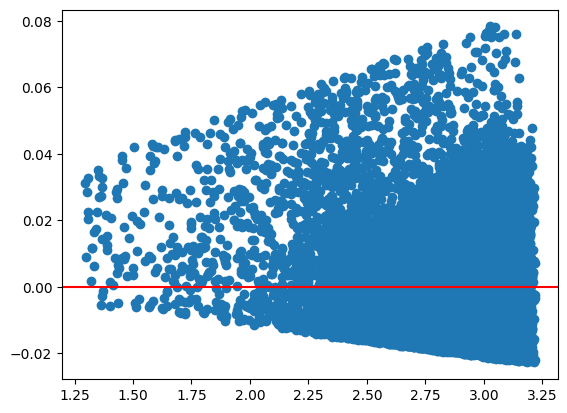

In [ ]:
#residuals (x is predicted value, y is residual (difference between predicted and actual))
predy = (data1a['e']*slope_new1)+inter_new1
resid = data1a['q'] - predy
plt.scatter(predy, resid)
plt.axhline(y=0.0, color = 'red')
#cone shaped because i cut the data weirdly?
#residuals look fucked up because of how unannturally the data is arranged? like the cone shape that the raw data has influences the residuals shape

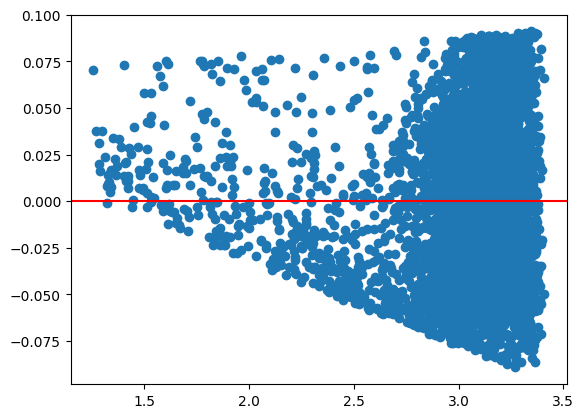

In [ ]:
predy2 = (data2a['e']*slope_new2)+inter_new2
resid2 = data2a['q'] - predy2
plt.scatter(predy2, resid2)
plt.axhline(y=0.0, color = 'red')

Mapping out Trojan resonances, 2.06, 2.50, 2.82, 2.96, and 3.28, would have to get more data from closer to the sun?

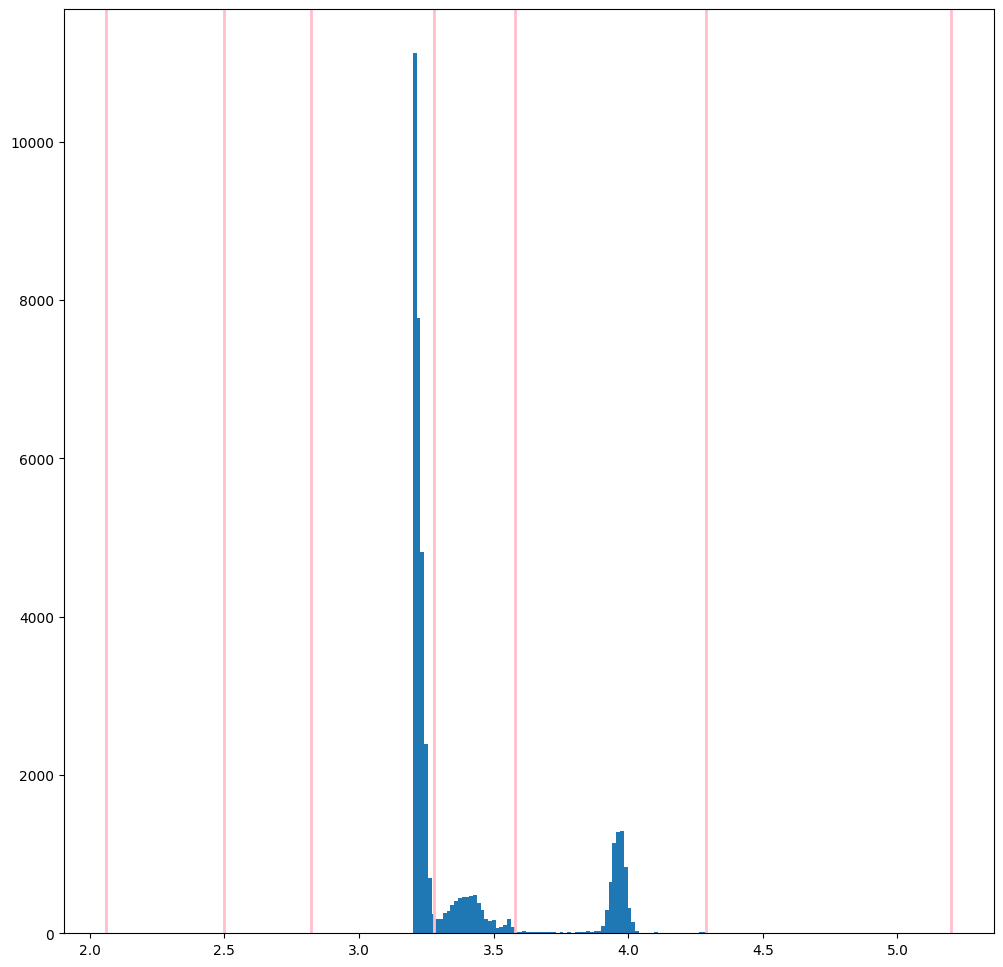

In [ ]:
plt.figure(figsize = (12, 12), dpi = 100)
plt.hist(data['a'], bins = 100)
plt.axvline(x = 2.06, color = 'PINK', linestyle = '-', linewidth = 2.0)
plt.axvline(x = 2.50, color = 'PINK', linestyle = '-', linewidth = 2.0)
plt.axvline(x = 2.82, color = 'PINK', linestyle = '-', linewidth = 2.0)
plt.axvline(x = 3.28, color = 'PINK', linestyle = '-', linewidth = 2.0)
plt.axvline(x = 3.58, color = 'PINK', linestyle = '-', linewidth = 2.0)
plt.axvline(x = 4.29, color = 'PINK', linestyle = '-', linewidth = 2.0)
plt.axvline(x = 5.2, color = 'PINK', linestyle = '-', linewidth = 2.0)

(array([1.1737e+04, 9.9420e+03, 2.8200e+03, 2.1840e+03, 2.3200e+02,
        2.7800e+02, 1.3900e+02, 3.2800e+02, 1.9400e+02, 5.0400e+02,
        2.8200e+02, 6.6100e+02, 3.0900e+02, 6.3000e+02, 3.4900e+02,
        6.5700e+02, 2.2200e+02, 3.4400e+02, 1.2000e+02, 2.5200e+02,
        6.5000e+01, 1.0800e+02, 5.3000e+01, 2.1000e+02, 9.7000e+01,
        3.2000e+01, 1.4000e+01, 3.2000e+01, 1.6000e+01, 2.4000e+01,
        1.2000e+01, 1.6000e+01, 1.4000e+01, 1.6000e+01, 1.4000e+01,
        1.5000e+01, 6.0000e+00, 1.1000e+01, 8.0000e+00, 1.1000e+01,
        5.0000e+00, 1.8000e+01, 1.2000e+01, 2.4000e+01, 1.8000e+01,
        2.1000e+01, 1.7000e+01, 3.6000e+01, 5.7000e+01, 3.6200e+02,
        1.0530e+03, 8.3200e+02, 1.6790e+03, 8.2100e+02, 9.1600e+02,
        1.5600e+02, 1.5700e+02, 1.9000e+01, 9.0000e+00, 2.0000e+00,
        5.0000e+00, 3.0000e+00, 1.6000e+01, 7.0000e+00, 6.0000e+00,
        5.0000e+00, 9.0000e+00, 0.0000e+00, 4.0000e+00, 6.0000e+00,
        5.0000e+00, 2.0000e+00, 6.0000e+00, 3.00

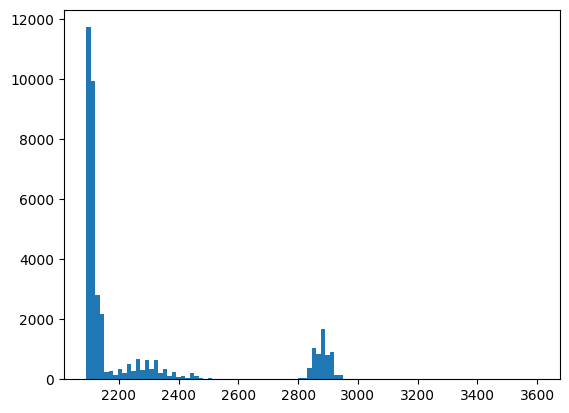

In [ ]:
plt.hist(data['per'], bins = 100)

#Monte Carlo

In [ ]:
#WHAT IS MY QUESTION- what is the true distribution of eccentricities over range of periods I'm working with

In [ ]:
#OBSERVED DATA #observed data frame has: period, eccentricity, semi major axis, long ascending node, inclination, perihleion arg, mean anomly, Mass*Gravitation constant, period
obsdata = data[['e', 'a', 'om', 'i', 'w', 'ma','per',]].dropna(how = 'any')
  #e, eccentricity
  #a, semi-major axis
  #om, longitude of ascending node
  #i, inclination
  #w, argument of perihelion
  #ma, mean anomaly


In [ ]:
##SIMULATED DATA
nsamp = 10000
estdata = pd.DataFrame()
estdata['e'] = np.random.uniform(low=0, high=0.999, size=nsamp)
estdata['a'] = np.random.normal(40,10,nsamp)
estdata['om'] = np.random.uniform(low=0, high=2*np.pi,size=nsamp)
estdata['i'] = np.arccos(np.random.uniform(0,1,nsamp))
estdata['w'] = np.random.uniform(low=0, high=2*np.pi,size=nsamp)
estdata['ma'] = np.random.uniform(0,2*np.pi,nsamp)
estdata['per'] = np.random.uniform(2000,4000,nsamp)


In [ ]:
#NEXT STEP
  #mean and covariance of observed data??
  #or calculate eccentricity given calcualted period?

NameError: ignored

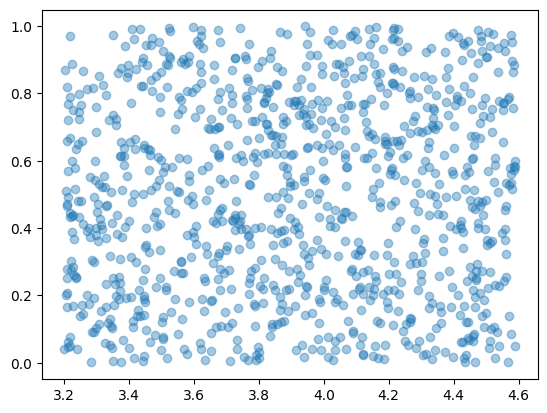

In [ ]:
#NOTES FROM MEETING
##setting constraints and generating points
#are parameters supposed to be the mean and cov of my original data?
#normal distribution, takes value between 0 and 1
ecc = np.random.uniform( 0, 0.999, 1000)
au = np.random.uniform(3.2, 4.59, 1000)
#you know nothing based about distributios, this is ecc and semi major axis
plt.scatter(au, ecc, alpha = 0.4)
#calculate perihastron and max distance from sun using orbital dynamics (aphastron)
#plot periastron v apastron and color by eccentricity
#at low eccentricies, perfectly circular eccentricity and so peri and appi are the same (radius doesn't change )
#things that are very eccentrcic have higher apastron and small perihastron
#start putting constraints
#perihastron = closest it gets to the sun
def perih(semia, ecc):
  return semia*(1+ecc)

ap = perih(au, ecc)
plt.hist(MCdata['e'], bins = 100)
#compare model to real data, modify constraints based on how they compare
#model at the beginning is like control sample
#if you don't know what distribution looks like do random uniform
#keplers third law- give semi major axis and get period
  #a**3 = p**2 --> works because sun is one solar mass star
 ## want to use semi major axis to approximate the period
  #lowkey assumes that ecc = 0 bc assuming that r = au
 # use calculated period and plot against eccentricity

#Data Distributions

Summary Statistics

In [ ]:
#Eccentricity
em = data['e'].mean(axis=0)
estd = data['e'].std(axis=0)

#Period
pm = data['per'].mean(axis=0)
pstd = data['per'].std(axis=0)

#Jupiter MOID
mjupm = data['moid_jup'].mean(axis=0)
mjupstd = data['moid_jup'].std(axis=0)

#q
qm = data['q'].mean(axis=0)
qstd = data['q'].std(axis=0)

#a
am = data['a'].mean(axis=0)
astd = data['a'].std(axis=0)

Summary Plots

In [ ]:
#three plots
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(24,9) )
f.suptitle('Variable Distributions', fontsize = 20)

#Eccentricity
ax1.hist(data['e'], bins = 40, alpha = 0.4, color = 'BLUE', label = "Mean: 0.14 Standard Deviation: 0.091")
ax1.title.set_text("Eccentricity")
ax1.legend(loc = "upper right", borderpad=0.15)

#Period
ax2.hist(data['per'], bins = 40, alpha = 0.4, color = 'PINK', label = "Mean: 2268.4 Standard Deviation: 288.6")
ax2.title.set_text("Period")
ax2.legend(loc = "upper right", borderpad=0.15)


#Jupiter Moid
ax3.hist(data['moid_jup'],  bins = 40, alpha = 0.4, color = 'GREEN', label = "Mean: 1.46 Standard Deviation: 0.45")
ax3.title.set_text("Jupiter MOID")
ax3.legend(loc = "upper right", borderpad=0.15)

#q
ax4.hist(data['q'], bins = 40, alpha = 0.4, color = 'ORANGE', label = "Mean: 2.89 Standard Deviation: 0.31")
ax4.title.set_text("Perihelion Distance")
ax4.legend(loc = "upper right", borderpad=0.15)


#a
ax5.hist(data['a'],  bins = 40, alpha = 0.4, color = 'RED', label = "Mean: 3.37 Standard Deviation: 0.28")
ax5.title.set_text("Semi Major Axis")
ax5.legend(loc = "upper right", borderpad=0.15)